In [2]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
# sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/data/FS_plots/"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
pathy=pathMAC

Machine arg is, CH1


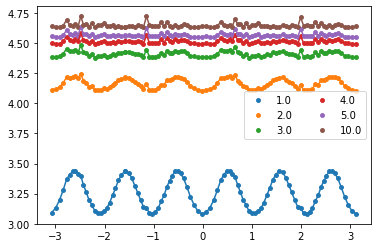

In [4]:

################
################

path=pathy+'data2022-04-30-10-52-10.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=float(df['T'].unique()[0])

plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
plt.plot(df['theta'], df['SE'])

################
################

path=pathy+'data2022-04-30-11-14-39.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=float(df['T'].unique()[0])

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()

plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
plt.plot(df['theta'], df['SE'])


################
################

path=pathy+'data2022-04-30-12-05-20.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=float(df['T'].unique()[0])


plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
plt.plot(df['theta'], df['SE'])

################
################
path=pathy+'data2022-04-30-12-09-42.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=float(df['T'].unique()[0])


plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
plt.plot(df['theta'], df['SE'])

################
################
path=pathy+'data2022-04-30-11-18-48.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=float(df['T'].unique()[0])


plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
plt.plot(df['theta'], df['SE'])

# # ################
# # ################

path=pathy+'data2022-04-30-12-19-32.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=float(df['T'].unique()[0])


plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
plt.plot(df['theta'], df['SE'])

plt.legend(ncol=2)
plt.show()

Machine arg is, CH1
4.239593349786966 4.188790204786391 4 1.0 1
4.11965447794984 4.188790204786391 2 1.0 2
4.247726395093093 4.188790204786391 3 1.0 3
4.099904956925824 4.188790204786391 1 1.0 4
4.1136833805161075 4.188790204786391 0 1.0 5
4.115924211381912 4.188790204786391 5 1.0 6


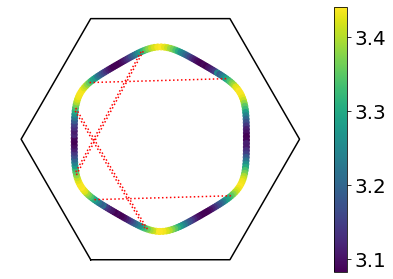

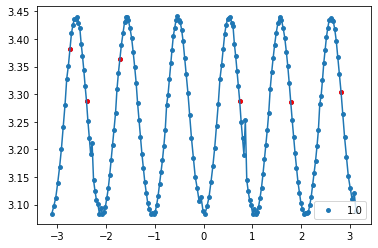

In [6]:
#REQUIRES TO PLAY A LOT WITH PARAMETERS, HOPEFULLY NOT A PROBLEM IF THE FS WAS SAMPLED VERY FINELY
################
################


path=pathy+'data2022-05-02-14-45-39.h5'
df = pd.read_hdf(path)
tss=df['T'].unique()

import seaborn as sns

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()

plt.plot(vx,vy, c='k')
im=scatter(df['KFX'], df['KFY'],c=df['SE'])

plt.gca().set_aspect('equal', adjustable='box')

cbar = plt.colorbar(im)
tick_font_size = 20
cbar.ax.tick_params(labelsize=tick_font_size)
yticks()
pyplot.locator_params(axis='y', nbins=4)
pyplot.locator_params(axis='x', nbins=7)

plt.axis('off')


plt.tight_layout()
# plt.show()

norm_Q=np.sqrt(vx[0]**2+vy[0]**2)

Npoints_FS=np.size(df['KFX'])
kfx=df['KFX']
kfy=df['KFY']
c=0
[vx,vy]=l.boundary()
vx=vx[:-1]
vy=vy[:-1]
c=np.zeros(np.size(vx))
c2=0
index_HS=[]
for i in range(int(Npoints_FS)): #only checking half of the points is enough
    bx=kfx[i]
    by=kfy[i]
    for j  in range(np.size(vx)):
        vvx=vx[j]
        vvy=vy[j]
        dist=np.sqrt( (kfx-bx-vvx)**2 +(kfy-by-vvy)**2)
        ind_mindist=np.argmin(dist)
        dist=np.sqrt( (kfx-bx)**2 +(kfy-by)**2)
        if np.abs(dist[ind_mindist]-norm_Q)<.1 and c[j]<1:
            c[j]=1+c[j]
            QX=kfx[ind_mindist]
            QY=kfy[ind_mindist]
            line_x=np.array([bx,QX])
            line_y=np.array([by,QY])
            plt.plot(line_x,line_y,  c='r', ls=':')
            c2=c2+1
            print(dist[ind_mindist],norm_Q, j, c[j],c2)
            index_HS.append(i)
plt.show()



df=df.sort_values(by=['theta'])
plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss[0]))
plt.scatter(df['theta'][index_HS], df['SE'][index_HS],  s=15,c='r')
plt.plot(df['theta'], df['SE'])
plt.legend()
plt.show()


Machine arg is, CH1


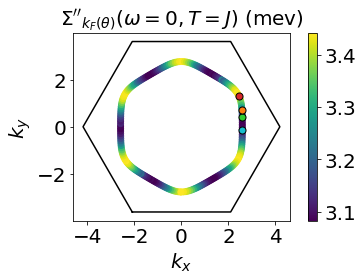

In [8]:
#REQUIRES TO PLAY A LOT WITH PARAMETERS, HOPEFULLY NOT A PROBLEM IF THE FS WAS SAMPLED VERY FINELY
################
################


path=pathy+'data2022-05-02-14-45-39.h5'
df = pd.read_hdf(path)
tss=df['T'].unique()

import seaborn as sns

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()

plt.plot(vx,vy, c='k')
im=scatter(df['KFX'], df['KFY'],c=df['SE'], label="T="+str(i))

cbar = plt.colorbar(im)
tick_font_size = 20
cbar.ax.tick_params(labelsize=tick_font_size)


angles=np.array([0,12, 18, 30])*np.pi/180
list_ind=[]
listcol=['tab:cyan','limegreen','tab:orange','tab:red']
for i,thet in enumerate(angles):
    ii=(np.argmin((np.angle(df['KFX']+1j*df['KFY'])-thet)**2))
    plt.scatter(df['KFX'][ii+1], df['KFY'][ii+1], zorder=2,s=50,  edgecolor='k', c=listcol[i])
   

plt.xlabel(r"$k_x$",size=20)
plt.ylabel(r"$k_y$",size=20)
pyplot.locator_params(axis='y', nbins=4)
pyplot.locator_params(axis='x', nbins=7)
# legend(ncol=1,prop={'size': 13})
plt.xticks(size=20)
plt.yticks(size=20)
plt.gca().set_aspect('equal', adjustable='box')
# plt.axis('off')
plt.title(r"$\Sigma ''_{k_F (\theta)}(\omega=0, T=J)$ (mev)", size=20)
# plt.text(7,-4.2,r"$\Sigma ''(k_F(\theta),0, T=J)$ (mev)", size=20, rotation =270)
plt.tight_layout()
# plt.show()
plt.savefig("./imgs/pap_fig1a.png", dpi=400)
plt.show()
plt.close()
# plt.show()